Single - Circular Linked List:

6. 708 - Insert into a Sorted Circular Linked List     
7. Custom - Josephus Circle (Classic interview problem)  

Double Linked List:  
8. 707 - Design Linked List  
9. 430 - Flatten a Multilevel Doubly Linked List  

Double - Circular Linked List:  
10. 146 - LRU Cache (Uses Doubly Linked List - much better than browser history)  


### 6. 708 - Insert into a Sorted Circular Linked List     

### Empty List
List = empty   
Insert value = 10


| Step | Action                   | head | tail | new_node.next | new_node.prev |
| ---- | ------------------------ | ---- | ---- | ------------- | ------------- |
| 1    | new_node created         | None | None | None          | None          |
| 2    | new_node.next = new_node | None | None | 10            | None          |
| 3    | new_node.prev = new_node | None | None | 10            | 10            |
| 4    | head = new_node          | 10   | None | 10            | 10            |
| 5    | tail = new_node          | 10   | 10   | 10            | 10            |


### 2: Insert at Head
List = 20 ⇄ 30 ⇄ 40 (circular)    
Insert value = 10
head = 20, tail = 40

| Step | Action                | head | tail |
| ---- | --------------------- | ---- | ---- |
| 1    | new_node created (10) | 20   | 40   |
| 2    | new_node.next = head  | 20   | 40   |
| 3    | new_node.prev = tail  | 20   | 40   |
| 4    | head.prev = new_node  | 20   | 40   |
| 5    | tail.next = new_node  | 20   | 40   |
| 6    | head = new_node       | 10   | 40   |


10 ⇄ 20 ⇄ 30 ⇄ 40 (circular)

### 3: Insert at Tail

List = 10 ⇄ 20 ⇄ 30 (circular)  
Insert value = 40 

head = 10, tail = 30


| Step | Action                | head | tail |
| ---- | --------------------- | ---- | ---- |
| 1    | new_node created (40) | 10   | 30   |
| 2    | new_node.next = head  | 10   | 30   |
| 3    | new_node.prev = tail  | 10   | 30   |
| 4    | tail.next = new_node  | 10   | 30   |
| 5    | head.prev = new_node  | 10   | 30   |
| 6    | tail = new_node       | 10   | 40   |



### 4: Insert in Middle
List = 10 ⇄ 20 ⇄ 40 ⇄ 50 (circular)   
Insert value = 30

| Step | current.value | Condition      |
| ---- | ------------- | -------------- |
| 1    | 10            | 10 < 30 → move |
| 2    | 20            | 20 < 30 → move |
| 3    | 40            | 40 ≥ 30 → STOP |

10 ⇄ 20 ⇄ 30 ⇄ 40 ⇄ 50    
↑_____________________↓



In [2]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None


In [3]:
def insert_sorted(self, value):
    new_node = Node(value)
    
    # Case 1: Empty list
    if self.length == 0:
        """
        Visualization:
        new_node: [value]
        After: [value] → [value] ← [value]
               ↑          self         ↑
               └───────────────────────┘
        """
        new_node.next = new_node
        new_node.prev = new_node
        self.head = new_node
        self.tail = new_node
    
    # Case 2: Insert at head
    elif value < self.head.value:
        """
        Visualization:
        Before: [H] ⇄ ... ⇄ [T]
        After: [new] ⇄ [H] ⇄ ... ⇄ [T]
        """
        new_node.next = self.head
        new_node.prev = self.tail
        self.head.prev = new_node
        self.tail.next = new_node
        self.head = new_node
    
    # Case 3: Insert at tail
    elif value > self.tail.value:
        """
        Visualization:
        Before: [H] ⇄ ... ⇄ [T]
        After: [H] ⇄ ... ⇄ [T] ⇄ [new]
        """
        new_node.next = self.head
        new_node.prev = self.tail
        self.tail.next = new_node
        self.head.prev = new_node
        self.tail = new_node
    
    # Case 4: Insert in middle
    else:
        """
        Visualization:
        Before: ... ⇄ [A] ⇄ [B] ⇄ ...
        After:  ... ⇄ [A] ⇄ [new] ⇄ [B] ⇄ ...
        """

        current = self.head
        while current.value < value:
            current = current.next   # stops at 40

        new_node.next = current      # 30 → 40
        new_node.prev = current.prev # 30 ← 20
        current.prev.next = new_node # 20 → 30
        current.prev = new_node      # 40 ← 30

    
    self.length += 1
    return True

### 7 Josephus Circle using Circular Linked List
❓ Problem :- n people in a circle, Every k-th person is eliminated, Find last remaining person

🧠 IDEA (VERY SIMPLE)
- Create a circular linked list of 1 → 2 → ... → n → back to 1
- Start from head
- Move k-1 steps
- Delete the k-th node
- Continue until only one node remains

🧪 Example    
n = 3, k = 2
  

head = 1, curr = head, prev = last node = 3
#### 🔁 Elimination Logic
Move k − 1 = 1 step  
Eliminate curr  
Continue until curr.next == curr  

1 → 2 → 3 →( back to 1) 

| Step | Code Action                | curr | prev | List  |
| ---- | -------------------------- | ---- | ---- | ----- |
| 1    | `curr = head`              | 1    | None | 1→2→3 |
| 2    | `prev = curr`              | 1    | 1    | 1→2→3 |
| 3    | `curr = curr.next`         | 2    | 1    | 1→2→3 |
| 4    | remove `curr` (2)          | 2    | 1    | 1→3   |
| 5    | `curr = curr.next`         | 3    | 1    | 1→3   |
| 6    | `prev = curr`              | 3    | 3    | 1→3   |
| 7    | `curr = curr.next`         | 1    | 3    | 1→3   |
| 8    | remove `curr` (1)          | 1    | 3    | 3     |
| 9    | stop (`curr.next == curr`) | 3    | 3    | 3     |

Survivor = 3




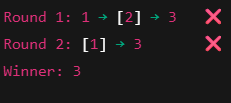

In [ ]:
def josephus(n, k):
    # Step 1: create circular linked list
    head = Node(1)
    prev = head

    for i in range(2, n + 1):
        prev.next = Node(i)
        prev = prev.next

    prev.next = head  # make circular

    # Step 2: elimination process
    curr = head
    prev = None

    while curr.next != curr:
        # move k-1 times
        for _ in range(k - 1): #2-1 =1
            prev = curr
            curr = curr.next

        # remove curr
        prev.next = curr.next
        curr = curr.next

    return curr.value


In [5]:
print(josephus(7, 3))  # 4


4


### 8. 707 - Design Linked List  


In [6]:
# 🧱 Node Structure
class Node:
    def __init__(self, val):
        self.val = val
        self.prev = None
        self.next = None

In [7]:
# 🏗️ Linked List Class (FULL SOLUTION)
class MyLinkedList:

    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

Index:   0       1       2  
List :  10 ⇄  20 ⇄  30

| Step | Code Line                       | curr points to | Explanation             |
| ---- | ------------------------------- | -------------- | ----------------------- |
| 1    | `get(1)`                        | —              | function called         |
| 2    | `if index < 0 or index >= size` | —              | 1 < 3 → valid index     |
| 3    | `curr = self.head`              | 10             | start from head         |
| 4    | `for _ in range(1)`             | 10 → 20        | move 1 step             |
| 5    | `return curr.val`               | 20             | return value at index 1 |


In [8]:
# 🔍 1️⃣ get(index)
# Rule:- If index is invalid → return -1
# Otherwise traverse and return value

def get(self, index):
    if index < 0 or index >= self.size:
        return -1

    curr = self.head
    for _ in range(index):
        curr = curr.next

    return curr.val

head → 20 ⇄ 30  
tail → 30    
size = 2     
addAtHead(10)    


| Step | Code Line              | head | tail | size | Meaning         |
| ---- | ---------------------- | ---- | ---- | ---- | --------------- |
| 1    | `new_node = Node(10)`  | 20   | 30   | 2    | create new node |
| 2    | `if size == 0`         | 20   | 30   | 2    | list not empty  |
| 3    | `new_node.next = head` | 20   | 30   | 2    | new → old head  |
| 4    | `head.prev = new_node` | 20   | 30   | 2    | old head ← new  |
| 5    | `head = new_node`      | 10   | 30   | 2    | update head     |
| 6    | `size += 1`            | 10   | 30   | 3    | size increased  |



In [9]:
#➕ 2️⃣ addAtHead(val)
def addAtHead(self, val):
    new_node = Node(val)

    if self.size == 0:
        self.head = self.tail = new_node
    else:
        new_node.next = self.head
        self.head.prev = new_node
        self.head = new_node

    self.size += 1

In [10]:
# Example
# addAtHead(10)
# List: 10

head → 10 ⇄ 20  
tail → 20  
size = 2  
addAtTail(30)  

| Step | Code Line              | head | tail | size | Meaning         |
| ---- | ---------------------- | ---- | ---- | ---- | --------------- |
| 1    | `new_node = Node(30)`  | 10   | 20   | 2    | create new node |
| 2    | `if size == 0`         | 10   | 20   | 2    | list not empty  |
| 3    | `tail.next = new_node` | 10   | 20   | 2    | old tail → new  |
| 4    | `new_node.prev = tail` | 10   | 20   | 2    | new ← old tail  |
| 5    | `tail = new_node`      | 10   | 30   | 2    | update tail     |
| 6    | `size += 1`            | 10   | 30   | 3    | size increased  |

10 ⇄ 20 ⇄ 30


In [11]:
#➕ 3️⃣ addAtTail(val)
def addAtTail(self, val):
    new_node = Node(val)

    if self.size == 0:
        self.head = self.tail = new_node
    else:
        self.tail.next = new_node
        new_node.prev = self.tail
        self.tail = new_node

    self.size += 1

In [12]:
# Example
# addAtTail(20)
# List: 10 ⇄ 20

Index:  0     1     2  
List : 10 ⇄ 20 ⇄ 30   
head → 10      
tail → 30  
size = 3    
addAtIndex(1, 15)

| Step | Code Line                      | curr    | List State        | Meaning         |
| ---- | ------------------------------ | ------- | ----------------- | --------------- |
| 1    | `addAtIndex(1,15)`             | —       | 10 ⇄ 20 ⇄ 30      | function called |
| 2    | `if index < 0 or index > size` | —       | unchanged         | index valid     |
| 3    | `if index == 0`                | —       | unchanged         | false           |
| 4    | `if index == size`             | —       | unchanged         | false           |
| 5    | `new_node = Node(15)`          | —       | unchanged         | create new node |
| 6    | `curr = head`                  | 10      | unchanged         | start from head |
| 7    | `for _ in range(1)`            | 10 → 20 | unchanged         | move to index   |
| 8    | `new_node.prev = curr.prev`    | —       | unchanged         | new ← 10        |
| 9    | `new_node.next = curr`         | —       | unchanged         | new → 20        |
| 10   | `curr.prev.next = new_node`    | —       | 10 → 15 → 20 → 30 | link 10 → 15    |
| 11   | `curr.prev = new_node`         | —       | 10 ⇄ 15 ⇄ 20 ⇄ 30 | link 20 ← 15    |
| 12   | `size += 1`                    | —       | unchanged         | size becomes 4  |


In [13]:
# ➕ 4️⃣ addAtIndex(index, val)
# Rules
# If index > size → do nothing
# If index == 0 → addAtHead
# If index == size → addAtTail

def addAtIndex(self, index, val):
    if index < 0 or index > self.size:
        return

    if index == 0:
        self.addAtHead(val)
        return

    if index == self.size:
        self.addAtTail(val)
        return

    new_node = Node(val)
    curr = self.head

    for _ in range(index):
        curr = curr.next

    new_node.prev = curr.prev
    new_node.next = curr
    curr.prev.next = new_node
    curr.prev = new_node

    self.size += 1

Index:  0     1     2     3
List : 10 ⇄ 20 ⇄ 30 ⇄ 40  
head → 10  
tail → 40  
size = 4  
deleteAtIndex(2)   # delete value 30

| Step | Code Line                       | curr         | head | tail | List State        | Meaning             |
| ---- | ------------------------------- | ------------ | ---- | ---- | ----------------- | ------------------- |
| 1    | `deleteAtIndex(2)`              | —            | 10   | 40   | 10 ⇄ 20 ⇄ 30 ⇄ 40 | function call       |
| 2    | `if index < 0 or index >= size` | —            | 10   | 40   | unchanged         | index valid         |
| 3    | `if size == 1`                  | —            | 10   | 40   | unchanged         | false               |
| 4    | `elif index == 0`               | —            | 10   | 40   | unchanged         | false               |
| 5    | `elif index == size-1`          | —            | 10   | 40   | unchanged         | false               |
| 6    | `curr = head`                   | 10           | 10   | 40   | unchanged         | start traversal     |
| 7    | `for _ in range(2)`             | 10 → 20 → 30 | 10   | 40   | unchanged         | reach index 2       |
| 8    | `curr.prev.next = curr.next`    | 30           | 10   | 40   | 10 ⇄ 20 → 40      | skip 30             |
| 9    | `curr.next.prev = curr.prev`    | 30           | 10   | 40   | 10 ⇄ 20 ⇄ 40      | backward link fixed |
| 10   | `size -= 1`                     | —            | 10   | 40   | unchanged         | size becomes 3      |



In [14]:
# ❌ 5️⃣ deleteAtIndex(index)
# Rules
# If invalid index → do nothing

def deleteAtIndex(self, index):
    if index < 0 or index >= self.size:
        return

    if self.size == 1:
        self.head = self.tail = None

    elif index == 0:
        self.head = self.head.next
        self.head.prev = None

    elif index == self.size - 1:
        self.tail = self.tail.prev
        self.tail.next = None

    else:
        curr = self.head
        for _ in range(index):
            curr = curr.next

        curr.prev.next = curr.next
        curr.next.prev = curr.prev

    self.size -= 1

In [15]:
# Head insert → fix head
# Tail insert → fix tail
# Middle insert → 4 pointer changes
# Delete → bypass node


## 9. 430 - Flatten a Multilevel Doubly Linked List  

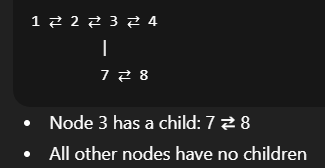

head → 1  
size = 4  
curr = head

| Step | curr | curr.child | nxt (saved) | Action                                                | List State                                    |
| ---- | ---- | ---------- | ----------- | ----------------------------------------------------- | --------------------------------------------- |
| 1    | 1    | None       | —           | No child, move next                                   | 1 ⇄ 2 ⇄ 3 ⇄ 4                                 |
| 2    | 2    | None       | —           | No child, move next                                   | 1 ⇄ 2 ⇄ 3 ⇄ 4                                 |
| 3    | 3    | 7 ⇄ 8      | 4           | Child exists → save curr.next (4)                     | 1 ⇄ 2 ⇄ 3 ⇄ 4, 3.child = 7                    |
| 4    | 3    | 7 ⇄ 8      | 4           | Connect child: 3.next = 7, 7.prev = 3, 3.child = None | 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8, 4 disconnected temporarily |
| 5    | 7    | None       | 4           | Find tail of child: temp = 7 → 8 (tail)               | 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8                             |
| 6    | 8    | None       | 4           | Connect tail to saved nxt: 8.next = 4, 4.prev = 8     | 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8 ⇄ 4                         |
| 7    | 7    | None       | —           | Move curr → curr.next = 7                             | 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8 ⇄ 4                         |
| 8    | 8    | None       | —           | Move curr → curr.next = 4                             | 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8 ⇄ 4                         |
| 9    | 4    | None       | —           | No child, move next → curr = None                     | 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8 ⇄ 4                         |
| 10   | None | —          | —           | End of loop                                           | Final flattened list: 1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8 ⇄ 4   |


1 ⇄ 2 ⇄ 3 ⇄ 7 ⇄ 8 ⇄ 4


In [18]:
class Solution:
    def flatten(self, head: 'Node') -> 'Node':
        curr = head

        while curr:
            if curr.child:
                # Step 1: save next
                nxt = curr.next

                # Step 2: connect child
                curr.next = curr.child #3.next= 7
                curr.child.prev = curr #7.prev =3
                curr.child = None #3.child = none

                # Step 3: find tail of child list
                temp = curr.next #7
                while temp.next:
                    temp = temp.next #8

                # Step 4: connect tail to saved next
                if nxt:
                    temp.next = nxt #8.next =4
                    nxt.prev = temp #4.prev =8

                # Step 5: move to next node
            curr = curr.next  # move forward (curr = 7 → 8 → 4 → ...)

        return head  # return flattened list


## 10. 146 - LRU Cache (Uses Doubly Linked List - much better than browser history)  

LRUCache capacity = 2   
Operations: put(1,1), put(2,2), get(1), put(3,3)


In [ ]:
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.prev = None
        self.next = None


In [19]:
class LRUCache:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = {}  # key -> node
        # Dummy head and tail to simplify add/remove
        self.head = Node(0, 0)
        self.tail = Node(0, 0)
        self.head.next = self.tail
        self.tail.prev = self.head

    # Remove a node from the list
    def _remove(self, node):
        prev, nxt = node.prev, node.next
        prev.next = nxt
        nxt.prev = prev

    # Add node right after head (mark MRU)
    def _add_to_head(self, node):
        node.prev = self.head
        node.next = self.head.next
        self.head.next.prev = node
        self.head.next = node

    def get(self, key: int) -> int:
        if key not in self.cache:
            return -1
        node = self.cache[key]
        self._remove(node)      # remove from current position
        self._add_to_head(node) # move to head (MRU)
        return node.val

    def put(self, key: int, value: int) -> None:
        if key in self.cache:
            node = self.cache[key]
            node.val = value
            self._remove(node)
            self._add_to_head(node)
        else:
            if len(self.cache) >= self.capacity:
                # remove LRU from tail
                lru = self.tail.prev
                self._remove(lru)
                del self.cache[lru.key]
            new_node = Node(key, value)
            self.cache[key] = new_node
            self._add_to_head(new_node)
